In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import re
from sklearn import preprocessing
import matplotlib.pyplot as plt
import statsmodels.formula.api as sf
from sklearn.linear_model import LinearRegression
from scipy import spatial
from sklearn.model_selection import train_test_split
import scipy
import scipy.stats as st
from math import sqrt

In [2]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    mu,sd = np.mean(a),np.std(a)
    z = st.t.ppf(confidence, n)
    h=z*sd/sqrt(n)
    return mu, h

# 1. Data description and preprocess
Data.csv is a table that contains the data we used for analysis. For example, column 1 to column 32 contain the features that we beileve are relevant to the hungercount number. It is important to notice that, because all the hungercount numbers were collected at the beginning of each year. So we used the next year hungercount number as the prediction for the current year. For example in row one, the values of all feature columns were collected in 1996. However, the hungercount number was collected at the begining of year 1997.

In [3]:
dataset = pd.read_csv('Data.csv')
dataset.head()

,Year,UnEmployment Rate,Barley Production,Corn for grain Production,Oats Production,Soybeans Production,Sunflower seed Production,Wheat Production,Extreme Weather #,Extreme Weather Cost,...,Arable land,Permanent crops,Total grain and wheat flour exports,Agriculture Emissions,Land Use Emissions,CPI,GDP,AG_Percent_in_GDP,Farm Net Income,HungerCount
0,1996,9.608,15562000,7541700,4361100,2169500,54900,29801400,16,68739948.1,...,45529,6914,26531,55845.41,12699,89.7,35.519,0.78,3819030,669877
1,1997,9.092,13533900,7179800,3489300,2737700,65100,24299400,10,39329591.7,...,45599,6777,27088,55032.55,6691,90.4,31.403,0.64,1564807,716496
2,1998,8.292,12708700,8952400,3957500,2736600,111800,24082300,12,313378423.3,...,45669,6641,22003,56785.20,34174,91.3,31.315,0.71,1820076,718292
3,1999,7.567,13196000,9161300,3641300,2780900,121900,26959900,27,20866884.6,...,45739,6504,25921,55667.41,14639,93.7,32.486,0.70,2131926,726902
4,2000,6.833,13228600,6953700,3403300,2703000,119300,26535500,8,1418645.9,...,45810,6368,27457,54259.25,5978,96.7,33.543,0.74,2435594,708334


In [4]:
dataset = dataset.drop(['Year'],axis=1) # drop the "year" column, which is useless for model prediction
dataset.head()

,UnEmployment Rate,Barley Production,Corn for grain Production,Oats Production,Soybeans Production,Sunflower seed Production,Wheat Production,Extreme Weather #,Extreme Weather Cost,"Eggs, hen, in shell",...,Arable land,Permanent crops,Total grain and wheat flour exports,Agriculture Emissions,Land Use Emissions,CPI,GDP,AG_Percent_in_GDP,Farm Net Income,HungerCount
0,9.608,15562000,7541700,4361100,2169500,54900,29801400,16,68739948.1,329940,...,45529,6914,26531,55845.41,12699,89.7,35.519,0.78,3819030,669877
1,9.092,13533900,7179800,3489300,2737700,65100,24299400,10,39329591.7,336300,...,45599,6777,27088,55032.55,6691,90.4,31.403,0.64,1564807,716496
2,8.292,12708700,8952400,3957500,2736600,111800,24082300,12,313378423.3,339420,...,45669,6641,22003,56785.20,34174,91.3,31.315,0.71,1820076,718292
3,7.567,13196000,9161300,3641300,2780900,121900,26959900,27,20866884.6,354081,...,45739,6504,25921,55667.41,14639,93.7,32.486,0.70,2131926,726902
4,6.833,13228600,6953700,3403300,2703000,119300,26535500,8,1418645.9,372390,...,45810,6368,27457,54259.25,5978,96.7,33.543,0.74,2435594,708334


In [5]:
names = list(dataset)
name1 = []  # in order to use statsmodels ols for analysis, we need to modify the column name and store into a new list
for i in names:
    i = re.sub(' |#|,','',i) # remove the syntax that cant be used in statsmodels ols model
    name1.append(i) # generate column names for ols linear regression

In [6]:
X = dataset.iloc[:, :-1].values # extract the features 
Y = dataset.iloc[:, -1].values # extract the targets
X_scaled = preprocessing.scale(X) # scale the features
Y_scaled = preprocessing.scale(Y) # scale the targets

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [7]:
df1 = pd.DataFrame(X_scaled) # generate a dataframe for features after being scaled
df1['target']=Y_scaled # append the scaled targets with name "target"
df1.columns=name1 # assign the modified column names to the dataframe
df1.head()

,UnEmploymentRate,BarleyProduction,CornforgrainProduction,OatsProduction,SoybeansProduction,SunflowerseedProduction,WheatProduction,ExtremeWeather,ExtremeWeatherCost,Eggsheninshell,...,Arableland,Permanentcrops,Totalgrainandwheatflourexports,AgricultureEmissions,LandUseEmissions,CPI,GDP,AG_Percent_in_GDP,FarmNetIncome,HungerCount
0,2.305918,2.005014,-1.176504,1.508857,-1.056792,-1.093253,1.027233,-0.013644,0.251156,-1.590487,...,0.433951,1.262625,-0.197703,-0.475213,-0.579635,-1.509277,-0.853181,1.255868,0.097986,-1.533742
1,1.748218,1.108131,-1.363814,0.021609,-0.486305,-0.821898,-0.239432,-0.750403,-0.124018,-1.442475,...,0.511597,1.089076,-0.100151,-0.869949,-1.158420,-1.444373,-1.109775,-0.079485,-0.709907,-0.806639
2,0.883566,0.743204,-0.446362,0.820335,-0.487409,0.420482,-0.289412,-0.504817,3.371892,-1.369865,...,0.589242,0.916795,-0.990736,-0.018839,1.489172,-1.360925,-1.115261,0.588191,-0.618421,-0.778627
3,0.099975,0.958702,-0.338241,0.280913,-0.442931,0.689177,0.373066,1.337082,-0.359538,-1.028670,...,0.666888,0.743246,-0.304539,-0.561653,-0.392744,-1.138396,-1.042260,0.492809,-0.506657,-0.644339
4,-0.693343,0.973119,-1.480838,-0.125103,-0.521145,0.620008,0.275361,-0.995990,-0.607630,-0.602577,...,0.745642,0.570965,-0.035524,-1.245474,-1.227107,-0.860236,-0.976366,0.874339,-0.397825,-0.933939


In [8]:
features_list1 = [] # an empty list, in order to store each feature column inside as a nested list
for i in name1:
    features_list1.append(list(df1[i])) # loop through the column names and store the data
target_list1 = features_list1.pop(-1) # take the target data out and assign it to a new list

# 2. Primary features' power analysis: 

For this assignment, we have made some assumpytions:<br> 
1. There is only linear relationship between the target and features. So all the analysis later will apply linear regression only.<br>
2. Besides, we will not consider the terms that is composed of more than two features. In our model, terms such as x1* x2 will not be used in our model.<br>
3. We only investigate the power of each feature to 3 at most. The reason is that we dont want our model overfit the data.

## 1): Graph analysis
Plot the graphs for the best fit line of each feature to the power of 1, 2 and 3. This process can give us an overview about the relation between our target "HungerCount" and each feature.

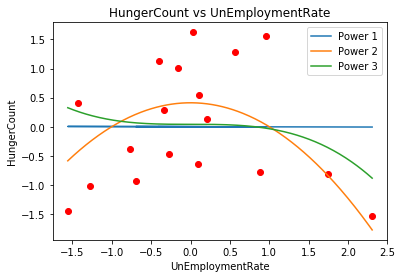

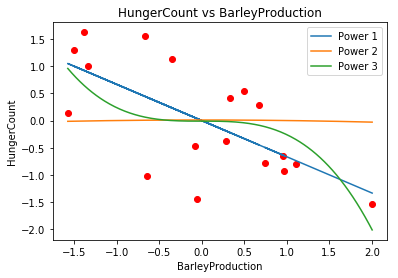

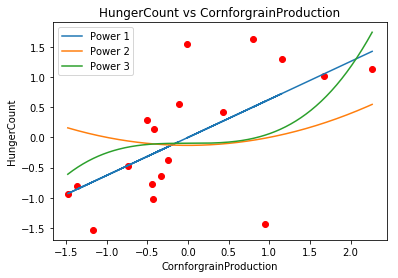

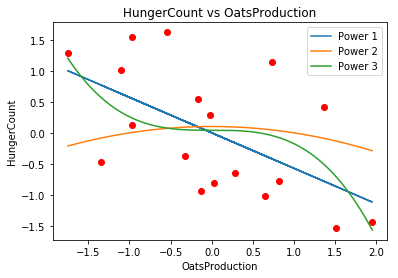

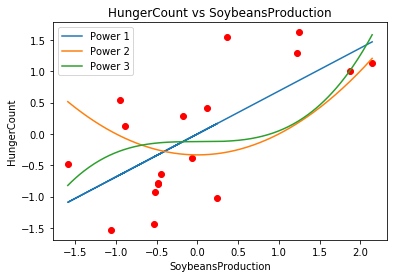

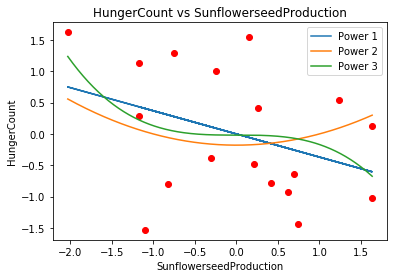

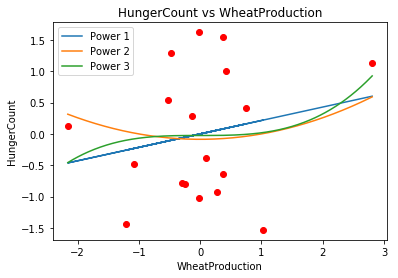

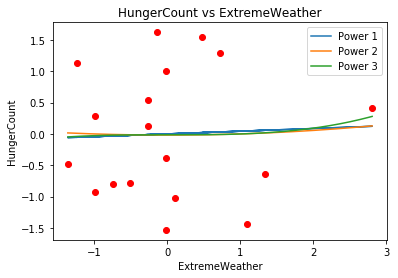

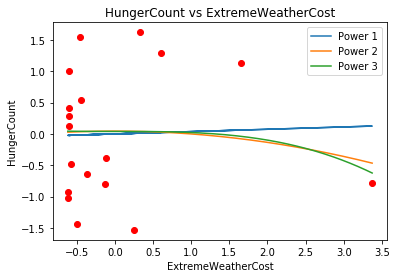

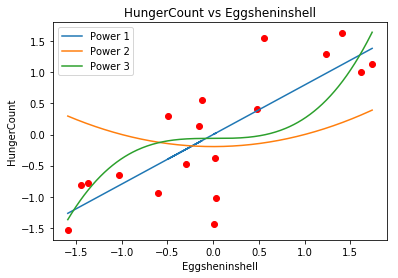

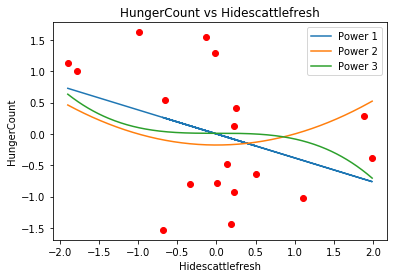

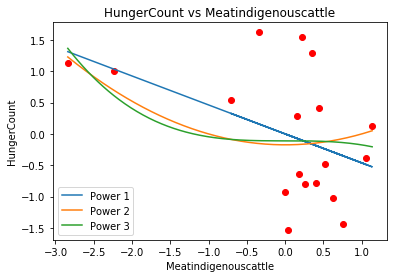

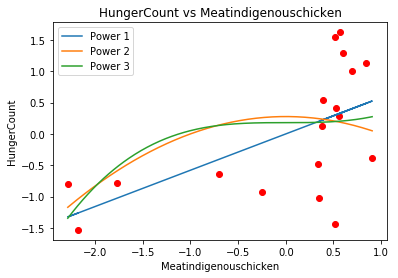

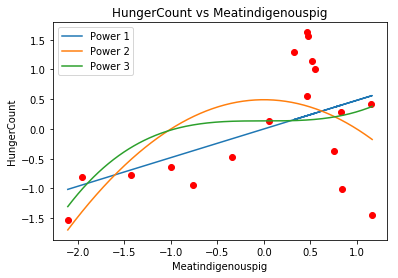

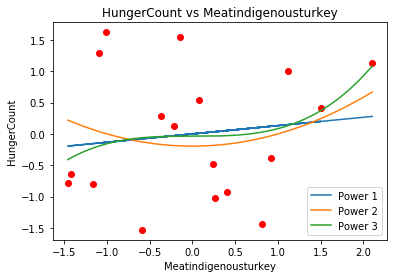

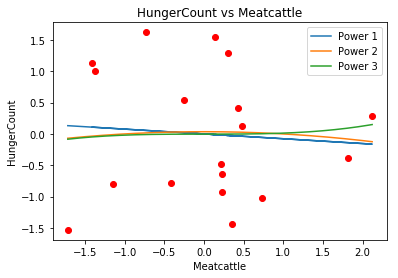

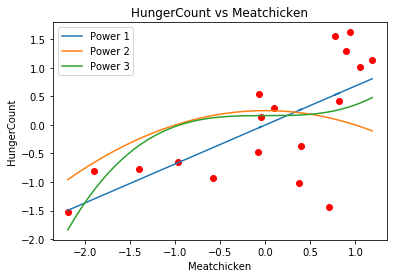

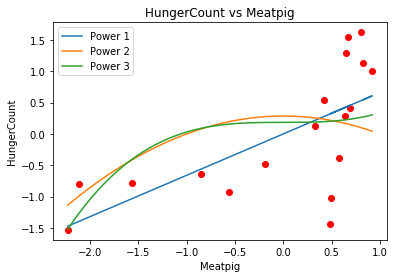

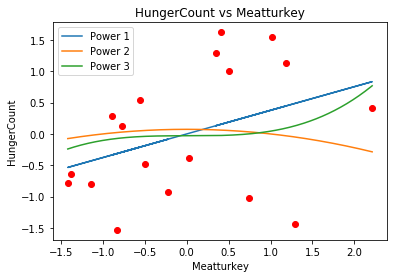

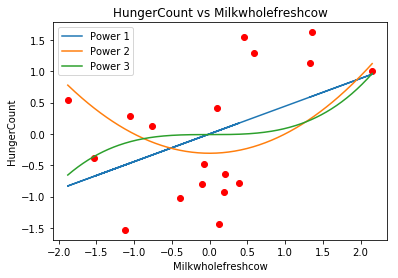

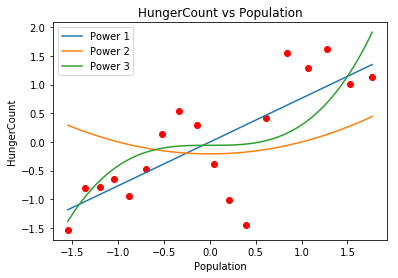

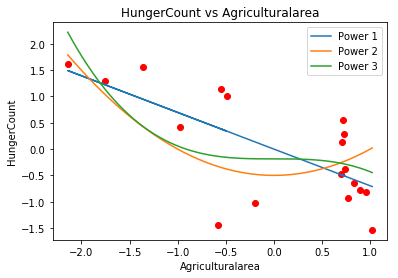

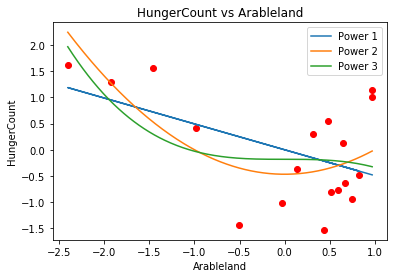

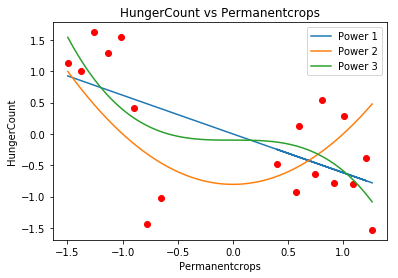

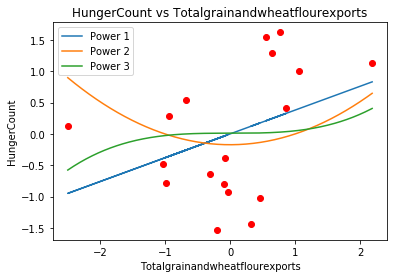

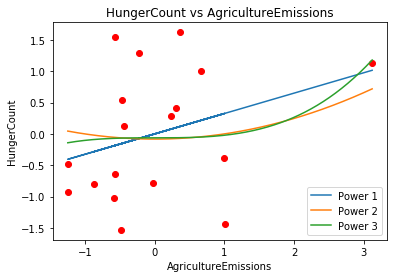

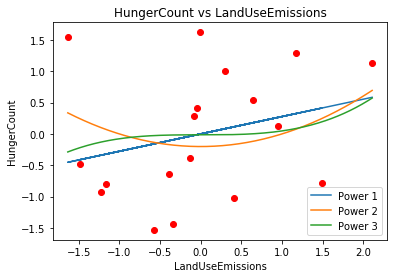

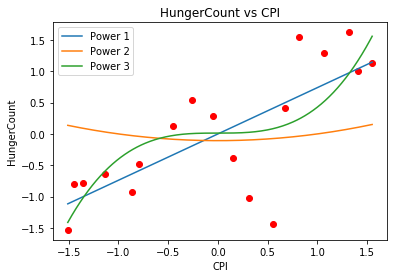

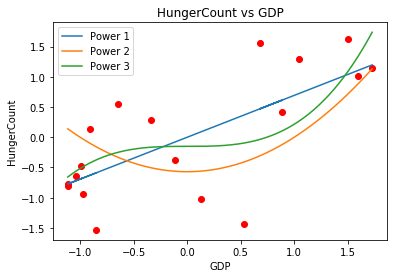

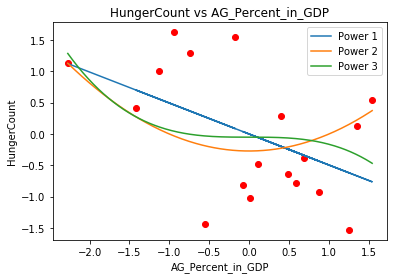

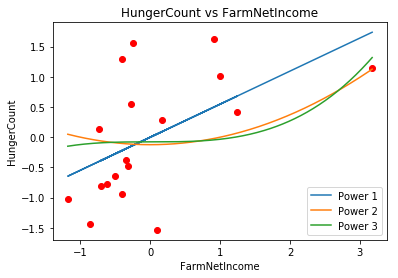

In [9]:
for i in range(len(features_list1)): # loop through each feature values in our data set
    fig, ax = plt.subplots()
    ##########
    
    ax.plot(features_list1[i], target_list1,'ro') # plot the original data points
    ##########
    
    m1, b1 = np.polyfit(features_list1[i], target_list1, 1) # use np.plotfit to fit the data in linear regression form and return the coefficients
    power1 = ax.plot(np.array(features_list1[i]), m1*np.array(features_list1[i]) + b1, '-') # plot the first power linear regression model
    ##########
    
    x_2 = [i ** 2 for i in features_list1[i]] # raise all values to the power of 2
    m2, b2 = np.polyfit(x_2, target_list1, 1) # same linear regression model to generate coefficients
    x2 = np.array(features_list1[i]) # convert to array, for smooting purpose later
    xnew2 = np.linspace(x2.min(),x2.max(),300) # generate a new array with 300 invertals between the max and min number from the list
    ynew2 = m2*np.power(xnew2,2)+b2 # calculate the new y values
    power2 = ax.plot(xnew2,ynew2,'-') # plot the graph
    ##########
    
    x_3 = [i ** 3 for i in features_list1[i]] # similar to the above process, but generate the relation between target and the features to the power of 3
    m3, b3 = np.polyfit(x_3, target_list1, 1)
    x3 = np.array(features_list1[i])
    xnew3 = np.linspace(x3.min(),x3.max(),300)
    ynew3 = m3*np.power(xnew3,3)+b3
    power3 = ax.plot(xnew3,ynew3,'-')
    ###########

    ax.set_title('HungerCount vs '+ name1[i] )
    ax.set_xlabel(name1[i])
    ax.set_ylabel('HungerCount')
    ax.legend([power1[0], power2[0],power3[0]], ['Power 1', 'Power 2','Power 3'])
    plt.show()

As shown in each graph, we are able to have a brief and overall understanding about the relationship between each feature to the target. This is our primary step to see if the data has any linear pattern and guess which model could be the potential candidate.

## 2):Features selection by investigating the P values of linear relationship.

In order to see which power will fit the linear regression model better, we can use the P values to determine which power has the strongest linear correlation between the target and the corresponding feature.

In [10]:
X_scaled_2 = np.square(X_scaled) # raise all features to the power of two
df2 = pd.DataFrame(X_scaled_2)  # generate a dataframe for the new features
df2['target']=Y_scaled # append the predicting in
df2.columns=name1 # rename the column names
df2.head()

,UnEmploymentRate,BarleyProduction,CornforgrainProduction,OatsProduction,SoybeansProduction,SunflowerseedProduction,WheatProduction,ExtremeWeather,ExtremeWeatherCost,Eggsheninshell,...,Arableland,Permanentcrops,Totalgrainandwheatflourexports,AgricultureEmissions,LandUseEmissions,CPI,GDP,AG_Percent_in_GDP,FarmNetIncome,HungerCount
0,5.317260,4.020082,1.384162,2.276649,1.116808,1.195203,1.055208,0.000186,0.063079,2.529648,...,0.188314,1.594222,0.039087,0.225828,0.335977,2.277916,0.727917,1.577205,0.009601,-1.533742
1,3.056266,1.227954,1.859990,0.000467,0.236492,0.675517,0.057327,0.563105,0.015380,2.080734,...,0.261731,1.186088,0.010030,0.756812,1.341937,2.086212,1.231601,0.006318,0.503967,-0.806639
2,0.780689,0.552352,0.199239,0.672950,0.237568,0.176805,0.083759,0.254840,11.369659,1.876531,...,0.347206,0.840513,0.981558,0.000355,2.217634,1.852116,1.243807,0.345969,0.382444,-0.778627
3,0.009995,0.919109,0.114407,0.078912,0.196188,0.474965,0.139178,1.787789,0.129268,1.058162,...,0.444739,0.552415,0.092744,0.315454,0.154248,1.295946,1.086306,0.242861,0.256701,-0.644339
4,0.480724,0.946960,2.192881,0.015651,0.271592,0.384410,0.075824,0.991996,0.369214,0.363099,...,0.555982,0.326001,0.001262,1.551207,1.505792,0.740006,0.953291,0.764468,0.158265,-0.933939


In [11]:
X_scaled_3 = np.power(X_scaled, 3) # raise the power of each feature to three
df3 = pd.DataFrame(X_scaled_3)  # generate a dataframe for new featreus
df3['target']=Y_scaled # append the predicting in 
df3.columns=name1 # rename the column names
df3.head()

,UnEmploymentRate,BarleyProduction,CornforgrainProduction,OatsProduction,SoybeansProduction,SunflowerseedProduction,WheatProduction,ExtremeWeather,ExtremeWeatherCost,Eggsheninshell,...,Arableland,Permanentcrops,Totalgrainandwheatflourexports,AgricultureEmissions,LandUseEmissions,CPI,GDP,AG_Percent_in_GDP,FarmNetIncome,HungerCount
0,12.261168,8.060322,-1.628473,3.435137,-1.180234,-1.306660,1.083944,-0.000003,0.015843,-4.023371,...,0.081719,2.012904,-0.007728,-0.107316,-0.194744,-3.438005,-0.621045,1.980762,0.000941,-1.533742
1,5.343020,1.360734,-2.536681,0.000010,-0.115007,-0.555206,-0.013726,-0.422556,-0.001907,-3.001406,...,0.133901,1.291740,-0.001005,-0.658388,-1.554526,-3.013268,-1.366800,-0.000502,-0.357770,-0.806639
2,0.689790,0.410510,-0.088933,0.552044,-0.115793,0.074343,-0.024241,-0.128647,38.337266,-2.570594,...,0.204589,0.770578,-0.972464,-0.000007,3.302438,-2.520589,-1.387170,0.203496,-0.236511,-0.778627
3,0.000999,0.881152,-0.038697,0.022168,-0.086898,0.327335,0.051923,2.390420,-0.046477,-1.088499,...,0.296591,0.410580,-0.028244,-0.177175,-0.060580,-1.475300,-1.132214,0.119684,-0.130059,-0.644339
4,-0.333307,0.921504,-3.247302,-0.001958,-0.141538,0.238337,0.020879,-0.988017,-0.224346,-0.218795,...,0.414564,0.186135,-0.000045,-1.931988,-1.847768,-0.636580,-0.930760,0.668404,-0.062962,-0.933939


In [12]:
p_feat1 = [] # an empty list in order to store the p values for each feature corresponding to different powers
for i in name1: # loop through the column name
    fml = 'HungerCount ~ '+i # generate the pattern for using ols function
    mod1 = sf.ols(formula=fml, data=df1) # assign the data and linear regression function into the mod1
    res1 = mod1.fit()  # predict the model between target and features to the power of 1
    mod2 = sf.ols(formula=fml, data=df2) # assign the data and linear regression function into the mod2
    res2 = mod2.fit()  # predict the model between target and features to the power of 2
    mod3 = sf.ols(formula=fml, data=df3) # assign the data and linear regression function into the mod3
    res3 = mod3.fit()  # predict the model between target and features to the power of 3
    p_feat1.append([res1.pvalues[1],res2.pvalues[1],res3.pvalues[1],i]) # output the p values for each and store into the empty list in a nested list form

In [13]:
p_result_df = pd.DataFrame(p_feat1) # convert the results into dataframe
p_result_df.columns = ['p1','p2','p3','name'] # assign the name for the column
p_result_df # return the dataframe structure for visualizing

,p1,p2,p3,name
0,9.917534e-01,1.370849e-02,3.108798e-01,UnEmploymentRate
1,2.546932e-03,9.670355e-01,7.245121e-03,BarleyProduction
2,5.155784e-03,4.979815e-01,3.812057e-02,CornforgrainProduction
3,1.282713e-02,6.542308e-01,2.091471e-02,OatsProduction
4,1.679879e-03,7.501431e-02,2.994305e-02,SoybeansProduction
5,1.304411e-01,4.293469e-01,1.133096e-01,SunflowerseedProduction
6,3.921839e-01,4.978257e-01,3.240852e-01,WheatProduction
7,8.643269e-01,8.958167e-01,7.848490e-01,ExtremeWeather
8,8.835997e-01,6.459267e-01,5.454888e-01,ExtremeWeatherCost
9,7.646317e-05,4.148672e-01,6.711156e-04,Eggsheninshell


Because p = 0.05 is the standard for us to tell if there is a linear relationship between under 95% confident interval, we can filter out the features that none of its P values for these three power are lower than 0.05. This is our primary filtering process for this analysis.

### 1: Primary feature filtering process

In [14]:
p_drop_df = p_result_df # duplicate the old dataframe and assign to a new variable
drop_list = [] # an new empty list to store the index for the features that will be dropped later
drop_list_name = [] # an new empty list to store the name for the features that will be dropped
for i in range(31):  # because the last row is hungercount, so we only need to loop through rwo index from 0 to 30, which are all features
    # check if all p values for a feature is larger than 0.05
    if p_result_df.as_matrix()[i][0] >0.05 and p_result_df.as_matrix()[i][1] >0.05 and p_result_df.as_matrix()[i][2] >0.05:
        drop_list.append(i) # if the criteria meets, we append the index into the list
        drop_list_name.append(p_result_df.as_matrix()[i][3]) # append the feature name into the list if the criteria meets
p_drop_df = p_drop_df.drop(p_drop_df.index[drop_list]) # drop the rows that we do not need
p_drop_df

,p1,p2,p3,name
0,9.917534e-01,1.370849e-02,3.108798e-01,UnEmploymentRate
1,2.546932e-03,9.670355e-01,7.245121e-03,BarleyProduction
2,5.155784e-03,4.979815e-01,3.812057e-02,CornforgrainProduction
3,1.282713e-02,6.542308e-01,2.091471e-02,OatsProduction
4,1.679879e-03,7.501431e-02,2.994305e-02,SoybeansProduction
9,7.646317e-05,4.148672e-01,6.711156e-04,Eggsheninshell
12,1.158352e-02,7.229313e-02,4.747014e-02,Meatindigenouschicken
13,4.333432e-02,8.047315e-03,7.096921e-02,Meatindigenouspig
16,1.820059e-03,1.973909e-01,1.431191e-02,Meatchicken
17,2.830181e-03,9.641175e-02,2.843816e-02,Meatpig


### 2: Secondary power filtering process:

Once we have the features that we need, we can start to decide to choose which power of each feature should be chosen to give us the best linear correlation between target and features under our assumptions.<br>
The most obvious way is to choose the power which can give the smallest P value for corresponding feature.

In [15]:
p_drop_array = p_drop_df[['p1','p2','p3']].as_matrix() # extract the p values and convert to a ndarray
n=0 # used as the row index for the ndarray we bulid above
p_f = [] # generate a list to store the chosen feature name and its chosen power
for i in p_drop_array: # loop through the rows
    # return the feature name, and use np.argmin to find out the index of minimun power, which +1 is the power chosen
    # generate a list contain the name of the feature and the power chosen and then appended into the p_f list
    p_f.append([p_drop_df.as_matrix()[n][3],np.argmin(i)+1]) 
    n+=1 # move the index to next row
p_f_df = pd.DataFrame(p_f) # generate a dataframe
p_f_df.columns = ['Feature names','Power chosen'] # assign column names into the dataframe
p_f_df

,Feature names,Power chosen
0,UnEmploymentRate,2
1,BarleyProduction,1
2,CornforgrainProduction,1
3,OatsProduction,1
4,SoybeansProduction,1
5,Eggsheninshell,1
6,Meatindigenouschicken,1
7,Meatindigenouspig,2
8,Meatchicken,1
9,Meatpig,1


This table here is the power of each features that we will be use to further investigate the linear relationship later in out analysis.

# 3. Lasso features selection

So far, we have determined the features and their best power that will be usef in our linear correlation between each feature and the HungerCount. Since there maybe so correlation among these features, we can then use lasso feature selection to filter out these features and the remain features will be regarded as independent features for our further analysis.

In [16]:
# Taking the scaled dataframe after dropping the non-correlated features as input data
df1_drop = df1.drop(drop_list_name,axis=1)
df1_drop.head()

,UnEmploymentRate,BarleyProduction,CornforgrainProduction,OatsProduction,SoybeansProduction,Eggsheninshell,Meatindigenouschicken,Meatindigenouspig,Meatchicken,Meatpig,Population,Agriculturalarea,Arableland,Permanentcrops,CPI,GDP,AG_Percent_in_GDP,FarmNetIncome,HungerCount
0,2.305918,2.005014,-1.176504,1.508857,-1.056792,-1.590487,-2.179719,-2.109941,-2.193629,-2.230293,-1.549986,1.020283,0.433951,1.262625,-1.509277,-0.853181,1.255868,0.097986,-1.533742
1,1.748218,1.108131,-1.363814,0.021609,-0.486305,-1.442475,-2.285309,-1.953859,-1.904000,-2.112910,-1.359147,0.955970,0.511597,1.089076,-1.444373,-1.109775,-0.079485,-0.709907,-0.806639
2,0.883566,0.743204,-0.446362,0.820335,-0.487409,-1.369865,-1.769091,-1.429813,-1.405490,-1.564283,-1.201356,0.892237,0.589242,0.916795,-1.360925,-1.115261,0.588191,-0.618421,-0.778627
3,0.099975,0.958702,-0.338241,0.280913,-0.442931,-1.028670,-0.704979,-0.996482,-0.968590,-0.856649,-1.049254,0.827924,0.666888,0.743246,-1.138396,-1.042260,0.492809,-0.506657,-0.644339
4,-0.693343,0.973119,-1.480838,-0.125103,-0.521145,-0.602577,-0.243903,-0.767091,-0.582882,-0.558308,-0.885531,0.764190,0.745642,0.570965,-0.860236,-0.976366,0.874339,-0.397825,-0.933939


## 1): Features and target extraction

In [17]:
# Take scaled HungerCount as target vector y, and the other variables as matrix X for the lasso model
df1_drop_array = df1_drop.iloc[:, :].values
lasso_X = df1_drop_array[:, :-1]
lasso_y = df1_drop_array[:, -1]

## 2): Raise the power of each feature to its corresponding chosen power

As shown in dataframe "p_f_df", we can see the features with index 0,7,12 need to be raised to the power of 2, and the features with index 13,14 need to be raised to the power 3.

In [18]:
# Raise the data in selected columns to the power that minimizes the P-value (details shown in previous steps)
for i in range(len(lasso_X)): # loop through the row index of the features matrix that will be used for lasso feature selection
    for j in range(len(lasso_X[i])): # for each row, loop through the index for each feature
         # because we have known indexs of features need to be raised to the power of 2, 
         # we can simply reassign the value of the features if the feature index in each row meet the criteria
        if j == 0 or j == 7 or j == 12:
            lasso_X[i][j] = lasso_X[i][j]**2
        # similarly, we can raise the power of features to power of 3 using same method
        if j == 13 or j == 14:
            lasso_X[i][j] = lasso_X[i][j]**3

In [19]:
# Apply Lasso/L1 Regularization to cut down number of features
lasso = Lasso(alpha=0.2) # we think alpha = 2 is a sufficient weighting for lasso penalty
lasso.fit(lasso_X, lasso_y) # fir the features and target
lasso_features = df1_drop.columns[0:18] # extract the feature names into a list
las_list = list(zip(lasso_features, lasso.coef_)) # combine each feature with its lasso cofficient into a list
las_list.sort(key = lambda tup: tup[1], reverse = True) # sort the nested list features by its lasso coefficient and show from larest to smallest coefficient
las_list_df = pd.DataFrame(las_list) # generate a dataframe
las_list_df.columns = ['Feature names' , 'Lasso Coefficient'] # assign column names into the dataframe
las_list_df

,Feature names,Lasso Coefficient
0,CPI,0.261092
1,Arableland,0.190615
2,BarleyProduction,-0.000000
3,CornforgrainProduction,0.000000
4,SoybeansProduction,0.000000
5,Eggsheninshell,0.000000
6,Meatindigenouschicken,0.000000
7,Meatindigenouspig,-0.000000
8,Meatchicken,0.000000
9,Meatpig,0.000000


As shown in the table, the Lasso regression model with alpha value equals to 0.2 has cut down the features to CPI, Arableland, EmploymentRate, and OatsProduction. Besides, the absolute value of each coefficient tells us the strength of the corrlation between the target and the corresponding feature. The sign of the features shows whether the feature and the target are positively or negatively correlated.<br>
The features with coefficients equal to 0 will be omitted and considered as irrelevant to our model for predicting hungercount number. Therefore, we have four features left after lasso selections, which are : CPI, Arableland, Employment Rate and Oats Production. These four features will be regarded as the features used to predict the hunger count number later in our nanlysis.<br>
Among all these four features, CPI has the largest lasso coefficient, which means the variation of CPI value will affect the variation of the hungercount number the most. So we decided to further analyze the CPI model under the same assumptions we made above.

# 4. CPI analysis:
## 1): Building CPI prediction model 

After conducting some online research, we have gathered additional data for the modeling of CPI in Canada. The features are selected based on Bank Canada's most correlated components of Canada's CPI. Since the features used here are already index, which are already under the same scale, we do not need to scale the feature down again in this analysis.

In [20]:
# Importing the CPI dataset
CPI_dataset = pd.read_csv('CPI_Data.csv')
CPI_X = CPI_dataset.iloc[:, 1:-1].values
CPI_y = CPI_dataset.iloc[:, -1].values

In [21]:
CPI_dataset.head()

,Year,Meat,"Fish, seafood and other marine products",Dairy products and eggs,Bakery and cereal products (excluding baby food),"Fruit, fruit preparations and nuts",Vegetables and vegetable preparations,Other food products and non-alcoholic beverages,Food purchased from table-service restaurants (17),Food purchased from fast food and take-out restaurants (17),...,Purchase and operation of recreational vehicles,"Home entertainment equipment, parts and services",Travel services,Other cultural and recreational services,Education,Reading material (excluding textbooks),Alcoholic beverages served in licensed establishments,Alcoholic beverages purchased from stores,Cigarettes,All-items
0,1985,63.3,60.1,70.3,67.6,78.1,67.0,75.2,56.9,60.1,...,55.7,104.9,53.5,42.8,33.1,47.2,54.2,56.4,33.3,65.6
1,1986,67.3,62.6,71.4,71.2,81.2,72.5,79.5,59.5,62.9,...,58.6,104.3,58.0,45.8,35.0,50.4,58.6,61.5,39.1,68.5
2,1987,72.7,68.6,72.7,73.1,82.0,80.4,80.2,62.1,65.2,...,62.3,105.9,59.9,49.1,36.8,54.3,62.3,64.7,42.4,71.2
3,1988,72.9,74.4,75.4,75.6,85.6,78.7,81.6,65.0,67.9,...,66.4,108.7,63.1,53.3,38.8,57.4,66.5,69.2,45.9,74.8
4,1989,75.1,77.2,77.8,78.0,82.9,85.1,84.7,68.3,71.4,...,70.2,110.2,65.0,56.6,40.8,60.2,69.6,72.2,54.1,78.4


## 2): Lasso feature selection

Similarly, we can apply lasso here to select the features.

In [22]:
lasso = Lasso(alpha=1, max_iter = 10000)
lasso.fit(CPI_X, CPI_y)
lasso_features = CPI_dataset.columns[1:61]
las_list = list(zip( lasso_features , lasso.coef_))
las_list.sort(key = lambda tup: tup[1], reverse = True)
las_list_df = pd.DataFrame(las_list) # generate a dataframe
las_list_df.columns = ['Feature names' , 'Lasso Coefficient'] # assign column names into the dataframe
las_list_df.head()

,Feature names,Lasso Coefficient
0,Other cultural and recreational services,0.216306
1,Health care goods,0.149374
2,Homeowners' replacement cost,0.106876
3,Reading material (excluding textbooks),0.078120
4,Education,0.057085


The results indicate that 'Other cultural and recreational services', 'Health care goods', "Homeowners' replacement cost" and six other features remained as the most correlated features by Lasso regression. These features can be further used for our analysis.

In [23]:
# Construct a list of eliminated features
selected_features = [name for name,value in las_list[1:10]]
# store the name of features that need to be dropped
drop_list_CPI = [feature for feature in CPI_dataset.columns if feature not in selected_features]

# Remove eliminated features from the dataset
CPI_X_new = CPI_dataset.drop(drop_list_CPI, axis = 1)
# Obtain new X values from the dataset
CPI_X = CPI_X_new.iloc[:,:].values

CPI_X_new.head()

,Mortgage interest cost,Homeowners' replacement cost,"Purchase, leasing and rental of passenger vehicles",Health care goods,Purchase and operation of recreational vehicles,Travel services,Education,Reading material (excluding textbooks),Cigarettes
0,87.1,61.0,63.9,61.4,55.7,53.5,33.1,47.2,33.3
1,86.7,66.4,69.2,65.3,58.6,58.0,35.0,50.4,39.1
2,87.7,76.3,70.5,70.9,62.3,59.9,36.8,54.3,42.4
3,90.7,83.0,73.5,76.5,66.4,63.1,38.8,57.4,45.9
4,99.4,89.5,77.6,80.5,70.2,65.0,40.8,60.2,54.1


## 3): Simple linear regression model without regularization.

We first begin by constructing a model with basic Linear Regression without penalty terms and investigate how good the model will be. The evaluation criteria used are:<br>
1. R square: The R square value can tells use how "fit" our prediction model is in the traning set. It gives us a sense about how good our model may be.<br>
2. Manhattan average: The reason we use Manhattan average here is we want to calculate how each year CPI prediction varies from the real value. Manhattan can give use the sum of absolute value of the difference between each year predicition and the real value. This gives us a sense about the overall performance of our prediction compared to the real value. We divided the manhattan value by the number of year predicted to give us an average value of the manhattan number.<br>
3. Manhattan percentage: It is also useful to calculate the percentage of prediction vary from the real value.

For our model, we will do 10 times random split cross validation.

In [24]:
CPI_np_nl = [] # CPI list to store the values
for i in range(10): # 10 times random split for cross validation
    X_train, X_test, y_train, y_test = train_test_split(CPI_X, CPI_y, test_size=0.2) # random split with test size 20%
    regressor = LinearRegression() 
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    m_s = spatial.distance.cityblock(y_pred,y_test)/len(y_test) # calculate the manhattan value and averge the value
    m_p = [] # empity list to store the percentage difference between CPI prediciton and real value
    for indx in range(len(y_pred)): # loop through the prediction
        m_p.append(abs(y_pred[indx]-y_test[indx])*100/y_test[indx]) # append the difference percentage between each year prediction and real value and append to the list
    
    m_value = np.mean(m_p) # take the mean value of all the percentage
    r_2_score = regressor.score(X_train,y_train) # extract the r square of the model
    random_num = i+1
    CPI_np_nl.append([random_num,r_2_score,m_s,m_value])    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [25]:
# Print out the evaluation results
CPI_np_df1 = pd.DataFrame(CPI_np_nl)
CPI_np_df1.columns = ['Train Test Split','R Squared','Manhattan Average','Manhattan percentage']
CPI_np_df1

,Train Test Split,R Squared,Manhattan Average,Manhattan percentage
0,1,0.999523,1.581868,1.864951
1,2,0.999246,0.882464,0.864617
2,3,0.999585,1.308116,1.244353
3,4,0.998776,0.785132,0.699939
4,5,0.998768,0.517460,0.513268
5,6,0.999358,1.051040,1.205963
6,7,0.999354,0.804692,0.922889
7,8,0.998613,0.513001,0.494065
8,9,0.999379,0.836258,0.951160
9,10,0.998983,0.969461,0.949367


As shown in the table, we realized that there were a lot of limitations in this model:<br>
1. Because the traning data size is too small, if we use random split, the number of random split needs to be larger than 10 to give a much more precise prediction.<br>
2. The manhattan average fluctuate way too much, which tells us the model do not work good enough, by either overfit or underfit the traning data.

Therefore, we decided to test the model performance with regularization under a larger number of random split experiment.

## 4): Linear regression model with ridge regularization

We chose to use L2 Regularization since the features have already been filtered by the L1 regularizer, which means we already have features that we believe are independent to each orther. In this case, using Ridge regularization here can give us a better sense about the weighting of each feature and see how strong each feature can affect our target predcition.

### Hyperparameter tunning for model:
Before we can confidently construct our prediction model, it is essential to determine the optimal alpha value for the L2 regularizer. As we have seen above, the random split number here need to be larger than 10 here. Also, we will try all alpha values from range 10^-4 to 10^4, with 1000 equally splits between.

In [26]:
CPI_l2 = [] # an empty list to store the necessary values
# a nested list. each list inside store all manhattan averges for each alpha value. therefore, we have 1000 lists inside
man_avg_list = [[] for i in range(1000)] 
# a nested list to store percentage difference
man_prc_list = [[] for i in range(1000)] 
for i in range(1000): # 1000 times random split
    X_train, X_test, y_train, y_test = train_test_split(CPI_X, CPI_y, test_size=0.2)
    
    index = 0 # this index is for assigning values in nested list 'man_avg_list' and 'man_prc_list'
    # try all alpha values
    for al in np.logspace(-4, 4, num=1000):
        regressor = Ridge(alpha= al)
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        
        m_s = spatial.distance.cityblock(y_pred,y_test)/len(y_test) # calculate manhattan average
        r_2_score = regressor.score(X_train,y_train) # return the R square value
        random_num = i+1 # represent random split number
         
        m_p = [] # an empty list to store all manhattan percentage for each time prediction
        for indx in range(len(y_pred)): # loop through the prediction
            m_p.append(abs(y_pred[indx]-y_test[indx])*100/y_test[indx])
        m_p_avg = np.mean(m_p) # get the average
        
        temp_list = [random_num,al,r_2_score,m_s,m_p_avg]
        CPI_l2.append(temp_list)
        
        man_avg_list[index].append((m_s)) # append the manhattan average to corresponding list inside
        man_prc_list[index].append((m_p_avg)) # append manhattan percentage to the list
        index += 1 # values for next alpha will be store in next list in the nested list

In [27]:
# Print out the results
CPI_l2_df = pd.DataFrame(CPI_l2)
CPI_l2_df.columns = ['Train Test Split','alpha','R Squared','Manhattan Averge','Manhattan percentage']
CPI_l2_df.head()

,Train Test Split,alpha,R Squared,Manhattan Averge,Manhattan percentage
0,1,0.000100,0.998701,0.703743,0.734782
1,1,0.000102,0.998701,0.703743,0.734782
2,1,0.000104,0.998701,0.703743,0.734782
3,1,0.000106,0.998701,0.703743,0.734782
4,1,0.000108,0.998701,0.703743,0.734782


As we have tried 1000 times random split with 1000 alpha values, it is hard to get the result fromt the table. Then we can try to plot the graph out to see how things change with alpha values change
### Graph plots: Manhattan Average vs Alpha Values

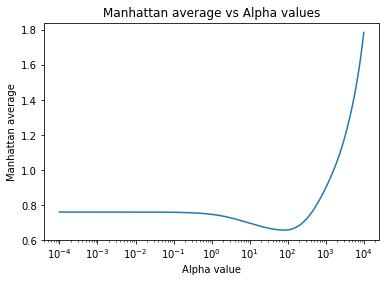

In [29]:
# Visualizing the relationship between the Alpha value and Manhattan average
# between prediction and true value
alpha_value = list(np.logspace(-4, 4, num=1000)) # generate a list for all alpha values
man_avg_mean = [] # empty list to store the mean of manhattan average
for i in range(len(alpha_value)): # loop through the index for the alphas
    # for each alpha value, take the average of all 1000 manhattan averge results and take average again
    man_avg_mean.append(np.mean([man_avg_list[i][j] for j in range(1000)])) 
    
plt.plot(alpha_value,man_avg_mean,'-')
plt.xscale('log')
plt.title('Manhattan average vs Alpha values')
plt.xlabel('Alpha value')
plt.ylabel('Manhattan average')
plt.show()

### Graph plots: Manhattan Percentage vs Alpha Values

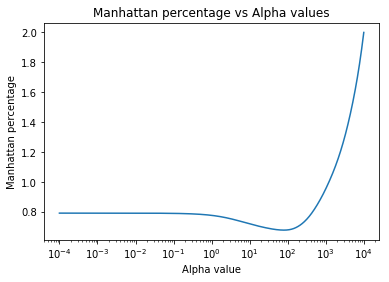

In [30]:
# Visualizing the relationship between the Alpha value and Manhattan percentage
# between prediction and true value
alpha_value = list(np.logspace(-4, 4, num=1000))
man_prc_mean = []# empty list to store the mean of manhattan percentage
for i in range(len(alpha_value)): # loop through the alpha values
    man_prc_mean.append(np.mean([man_prc_list[i][j] for j in range(1000)])) # get the mean of man
    
plt.plot(alpha_value,man_prc_mean,'-')
plt.xscale('log')
plt.title('Manhattan percentage vs Alpha values')
plt.xlabel('Alpha value')
plt.ylabel('Manhattan percentage')
plt.show()

Both of these two graphs show the optimal alpha value is between 10 and 100.

### Output the best alpha value that gives the smallest manhattan average

In [31]:
# Print out the top 5 best performing Alpha values
alpha_CPI_avg = [(np.mean(man_avg_list[i]),alpha_value[i]) for i in range(1000)]
alpha_CPI_avg.sort(key=lambda tup:tup[0], reverse=False)
alpha_CPI_avg[0]

(0.65847097465561844, 79.781445720766285)

### Output the best alpha value that gives the smallest manhattan percentage

In [32]:
# Print out the top 5 best performing Alpha values
alpha_CPI_prc = [(np.mean(man_prc_list[i]),alpha_value[i]) for i in range(1000)]
alpha_CPI_prc.sort(key=lambda tup:tup[0], reverse=False)
alpha_CPI_prc[0]

(0.6778276643404888, 79.781445720766285)

In [33]:
alpha_average_CPI = (alpha_CPI_avg[0][1] + alpha_CPI_prc[0][1])/2
alpha_average_CPI

79.781445720766285

As shown in the results, alpha value equals to 79.781446 gives us the best accuary for all these two measurements. We will use this alpha for further model analysis

## 5) CPI model implementation:

In [34]:
# Training the prediction model on 1000 random split training sets, and evaluate the model
# performance on %error between prediction and true value based on Manhattan distance 
man_avg_list = []
man_prc_list = []

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(CPI_X, CPI_y, test_size=0.2)
    regressor = Ridge(alpha = alpha_average_CPI)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    m_s = spatial.distance.cityblock(y_pred,y_test)/len(y_test)
    
    man_p_tm = []
    for j in range(len(y_pred)):
        man_p_tm.append(abs(y_pred[j] - y_test[j])*100/y_test[j])
    
    man_prc_list.append(np.mean(man_p_tm))
    man_avg_list.append(m_s)

### Mean and confidence interval analysis for manhattan percentage

In [36]:
man_p_mn,man_p_ci = mean_confidence_interval(man_prc_list)
print(man_p_mn,man_p_ci)

0.679223451421 0.0125223198349


In [37]:
upper_bound = man_p_mn + man_p_ci
lower_bound = man_p_mn - man_p_ci
print ('The model uncertainty upper_bound is', upper_bound)
print ('The model uncertainty lower_bound is', lower_bound)

The model uncertainty upper_bound is 0.691745771255
The model uncertainty lower_bound is 0.666701131586


In [38]:
print ('The model upper_bound accuracy is', 100-upper_bound)
print ('The model lower_bound accuracy is', 100-lower_bound)

The model upper_bound accuracy is 99.3082542287
The model lower_bound accuracy is 99.3332988684


### Analysis and conclusion for CPI model:
Because the manhattan percentage is the absolute value percentage, our confident interval will be affect also. By analyzing the results above, we can draw the following conclusions:<br>
1. Because the manhattan percentage reflect the average percentage of difference between the prediciton CPI and real CPI for each year, and it is less than 1%. So we can say that our model is realtively accurate.<br>
2. Low manhattan percentage means the 9 CPI features we chosed for building the model are strongly correlated to the CPI values. It means using these features can accurately predict the CPI values as well. So we decide to use these 9 features later for building our hungercount model for further analysis.<br>
3. The 95% confidence interval for the accuracy of CPI prediction  is from 99.308% to 99.333%.

# 5. HungerCount Prediction

## 1): Data extraction and preprocess

In [39]:
# Importing the dataset for 
HCxCPI_dataset = pd.read_csv('HCxCPI_Data.csv')
HCxCPI_X = HCxCPI_dataset.iloc[:, 1:-1].values
HCxCPI_y = HCxCPI_dataset.iloc[:, -1].values

In [40]:
HCxCPI_dataset.head()

,Year,Mortgage interest cost,Homeowners' replacement cost,"Purchase, leasing and rental of passenger vehicles",Health care goods,Purchase and operation of recreational vehicles,Travel services,Other cultural and recreational services,Education,Reading material (excluding textbooks),Employment Rate,Oats Production,Arable land,HungerCount
0,1996,95.6,88.6,99.6,93.8,90.8,88.7,84.9,84.1,88.6,9.608,4361100,45529,669877
1,1997,95.8,89.6,101.0,95.4,93.1,92.8,88.5,89.0,90.2,9.092,3489300,45599,716496
2,1998,100.0,92.1,100.4,97.3,95.6,98.3,91.8,93.1,93.1,8.292,3957500,45669,718292
3,1999,102.9,95.3,100.6,99.5,96.8,100.3,95.6,96.3,96.3,7.567,3641300,45739,726902
4,2000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,6.833,3403300,45810,708334


In [41]:
X_scaled = preprocessing.scale(HCxCPI_X) # scale down the features.

## 2): Simple linear regression without regularizaiton

In [42]:
HCxCPI_np_nl = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, HCxCPI_y, test_size=0.2)
    
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    m_s = spatial.distance.cityblock(y_pred,y_test)/len(y_test)
    random_num = i+1
    r_2_score = regressor.score(X_train,y_train)
    
    m_p = [] 
    for indx in range(len(y_pred)):
        m_p.append(abs(y_pred[indx]-y_test[indx])*100/y_test[indx])
    m_value = np.mean(m_p)
    HCxCPI_np_nl.append([random_num,r_2_score,m_s,m_value])

In [43]:
HCxCPI_np_df = pd.DataFrame(HCxCPI_np_nl)
HCxCPI_np_df.columns = ['Train Test Split','R Squared','Manhattan Average','Manhattan percentage']
HCxCPI_np_df.head()

,Train Test Split,R Squared,Manhattan Average,Manhattan percentage
0,1,1.000000,25497.668813,3.564732
1,2,0.994817,28060.091725,4.099182
2,3,0.999830,48703.188179,6.561781
3,4,0.999446,33889.668544,4.277079
4,5,0.998650,55689.740797,7.553561


Similarly, without regularization, the model fluctuates too much. Also, these features are already selected after lasso so they are independent. We will then try to further analysis the data by applying linear regrssion model with ridge regularization.

## 3): Linear regression with Ridge Regularization

### Hyperparameter tunning

In [44]:
HCxCPI_l2 = []
man_avg_list = [[] for i in range(1000)] 
man_prc_list = [[] for i in range(1000)] 
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, HCxCPI_y, test_size=0.2)
    index = 0
    for al in np.logspace(-4, 4, num=1000):
        regressor = Ridge(alpha= al)
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        
        m_s = spatial.distance.cityblock(y_pred,y_test)/len(y_test)
        r_2_score = regressor.score(X_train,y_train)
        random_num = i+1
        
        m_p = [] 
        for indx in range(len(y_pred)):
            m_p.append(abs(y_pred[indx]-y_test[indx])*100/y_test[indx])
        m_p_avg = np.mean(m_p)
        
        HCxCPI_l2.append([random_num,al,r_2_score,m_s,m_p_avg])
        
        man_avg_list[index].append((m_s))
        man_prc_list[index].append((m_p_avg)) 
        index += 1 

In [45]:
HCxCPI_l2_df = pd.DataFrame(HCxCPI_l2)
HCxCPI_l2_df.columns = ['Train Test Split','alpha','R Squared','Manhattan Averge','Manhattan percentage']
HCxCPI_l2_df.head()

,Train Test Split,alpha,R Squared,Manhattan Averge,Manhattan percentage
0,1,0.000100,0.999798,55523.118752,7.744603
1,1,0.000102,0.999798,55486.387224,7.739616
2,1,0.000104,0.999797,55449.019735,7.734542
3,1,0.000106,0.999797,55411.006134,7.729380
4,1,0.000108,0.999796,55372.336138,7.724129


### Graph plots: Manhattan Average vs Alpha Values

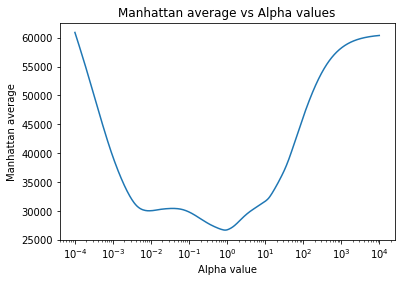

In [46]:
alpha_value = list(np.logspace(-4, 4, num=1000))
man_avg_mean = []
for i in range(len(alpha_value)):
    man_avg_mean.append(np.mean([man_avg_list[i][j] for j in range(1000)]))
    
plt.plot(alpha_value,man_avg_mean,'-')
plt.xscale('log')
plt.title('Manhattan average vs Alpha values')
plt.xlabel('Alpha value')
plt.ylabel('Manhattan average')
plt.show()

### Graph plots: Manhattan Percentage vs Alpha Values

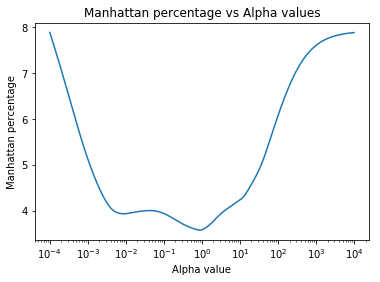

In [47]:
alpha_value = list(np.logspace(-4, 4, num=1000))
man_prc_mean = []
for i in range(len(alpha_value)):
    man_prc_mean.append(np.mean([man_prc_list[i][j] for j in range(1000)]))
    
plt.plot(alpha_value,man_prc_mean,'-')
plt.xscale('log')
plt.title('Manhattan percentage vs Alpha values')
plt.xlabel('Alpha value')
plt.ylabel('Manhattan percentage')
plt.show()

In [48]:
# Print out the top 5 best performing Alpha values
alpha_HC_avg = [(np.mean(man_avg_list[i]),alpha_value[i]) for i in range(1000)]
alpha_HC_avg.sort(key=lambda tup:tup[0], reverse=False)
alpha_HC_avg[0]

(26685.849754672126, 0.88704968896544034)

In [49]:
alpha_HC_prc = [(np.mean(man_prc_list[i]),alpha_value[i]) for i in range(1000)]
alpha_HC_prc.sort(key=lambda tup:tup[0], reverse=False)
alpha_HC_prc[0]

(3.5732190311098146, 0.8708431497690724)

In [50]:
alpha_average_HC = (alpha_HC_avg[0][1]+alpha_HC_prc[0][1])/2
alpha_average_HC

0.87894641936725637

The alpha values for these two evaluation criterias are different. So we take the average of these two alpha and used for model implementation.

## 4) HungerCount model implementation:

In [51]:
# Training the prediction model on 1000 random split training sets, and evaluate the model
# performance on %error between prediction and true value based on Manhattan distance 
man_avg_list = []
man_prc_list = []

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, HCxCPI_y, test_size=0.2)
    regressor = Ridge(alpha = alpha_average_HC)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    m_s = spatial.distance.cityblock(y_pred,y_test)/len(y_test)
    
    man_p_tm = []
    for j in range(len(y_pred)):
        man_p_tm.append(abs(y_pred[j] - y_test[j])*100/y_test[j])
    
    man_prc_list.append(np.mean(man_p_tm))
    man_avg_list.append(m_s)

### Mean and confidence interval analysis for manhattan percentage

In [52]:
man_p_mn,man_p_ci = mean_confidence_interval(man_prc_list)
print(man_p_mn,man_p_ci)

3.69859666943 0.0812765566899


In [53]:
upper_bound = man_p_mn + man_p_ci
lower_bound = man_p_mn - man_p_ci
print ('The model uncertainty upper_bound is', upper_bound)
print ('The model uncertainty lower_bound is', lower_bound)

The model uncertainty upper_bound is 3.77987322612
The model uncertainty lower_bound is 3.61732011274


In [54]:
print ('The model upper_bound accuracy is', 100-upper_bound)
print ('The model lower_bound accuracy is', 100-lower_bound)

The model upper_bound accuracy is 96.2201267739
The model lower_bound accuracy is 96.3826798873


### Analysis and conclusion for CPI model:
Because the manhattan percentage is the absolute value percentage, our confident interval will be affect also. By analyzing the results above, we can draw the following conclusions:<br>
1. Because the manhattan percentage reflect the average percentage of difference between the prediciton CPI and real CPI for each year, and it is about 4%. So we can say that our model is realtively accurate.<br>
2. Low manhattan percentage means the features we chosed for building the model are strongly correlated to the hungercount values. It means using these features can accurately predict the hungercountI values as well.<br>
3. The 95% confidence interval for the accuracy of HungerCount prediction  is from 99.220% to 99.383%.